# DATA CLEANING


### Import Libraries

In [1]:
using DataFrames

In [2]:
using CSV

In [3]:
using Plots

In [4]:
using GLM

In [5]:
using Lathe

In [6]:
using Statistics 

In [7]:
using StatsPlots

In [8]:
using MLBase

### Import Dataset

In [9]:
anime = CSV.read("C:/Users/Akunna Anyamkpa/Downloads/AnimeMl/top250_anime.csv", DataFrame)
 first(anime,7)

,Rank,Title,Popularity,Genre
,Int64,String,Int64,String?
1,1,Shingeki no Kyojin: The Final Season - Kanketsu-hen,609,"Action, Drama, Suspense"
2,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy"
3,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy"
4,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense"
5,5,Gintama\xb0,335,"Action, Comedy, Sci-Fi"
6,6,Kaguya-sama wa Kokurasetai: Ultra Romantic,221,"Comedy, Romance"
7,7,Shingeki no Kyojin Season 3 Part 2,26,"Action, Drama"


### Check number of rows and columns

In [10]:
size(anime)

(250, 12)

### Check column names

In [11]:
names(anime)

12-element Vector{String}:
 "Rank"
 "Title"
 "Popularity"
 "Genre"
 "Studio"
 "Type"
 "Episodes"
 "Duration"
 "Start_date"
 "End_date"
 "Members"
 "Score"

### Data Profiling

In [12]:
describe(anime)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Rank,125.5,1,125.5,250
2,Title,,3-gatsu no Lion,,Zoku Owarimonogatari
3,Popularity,855.46,1,490.0,5794
4,Genre,,"Action, Award Winning, Drama, Sci-Fi",,"Supernatural, Suspense"
5,Studio,,8bit,,ufotable
6,Type,,Movie,,TV
7,Episodes,17.7912,1,12.0,201
8,Duration,41.72,3,24.0,161
9,Start_date,,#VALUE!,,Sep-22


### Sum the total number of missing values

In [13]:
# count the total number of missing values in the DataFrame
n_missing = sum.(ismissing, eachcol(anime))

# print the result
println("Total number of missing values: ", sum(n_missing))

Total number of missing values: 8


### Drop rows with missing values

In [19]:
dropmissing!(anime)
first(anime, 5)

,Rank,Title,Popularity,Genre
,Int64,String,Int64,String
1,1,Shingeki no Kyojin: The Final Season - Kanketsu-hen,609,"Action, Drama, Suspense"
2,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy"
3,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy"
4,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense"
5,5,Gintama\xb0,335,"Action, Comedy, Sci-Fi"


### Re-Sum the total number of missing values

In [17]:
# count the total number of missing values in the DataFrame
n_missing = sum.(ismissing, eachcol(anime))

# print the result
println("Total number of missing values: ", sum(n_missing))

Total number of missing values: 0


### Detect Outliers

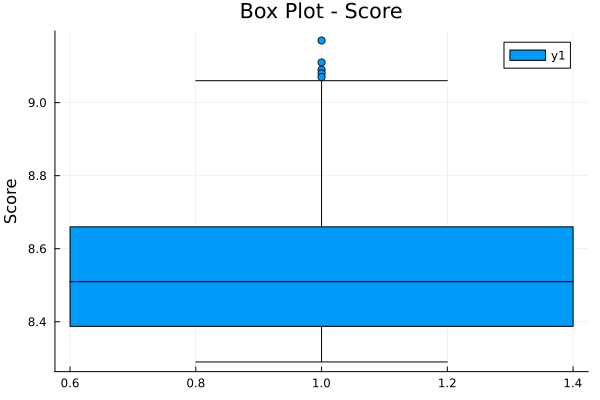

In [20]:
boxplot(anime.Score, title = "Box Plot - Score", ylabel ="Score")

### Remove Outlier

In [21]:
first_percentile = percentile(anime.Score, 25)
iqr_value = iqr(anime.Score)
anime = anime[anime.Score .>  (first_percentile - 1.5*iqr_value),:];

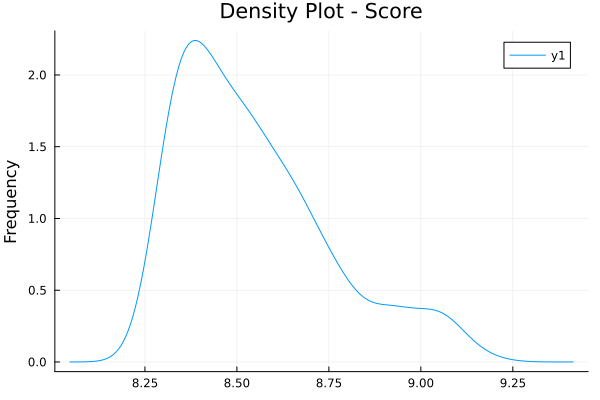

In [22]:
density(anime.Score, title = "Density Plot(Score)", ylabel = "Frequency")

### Convert categorical features to numeric features

In [33]:
type_studio = labelmap(anime.Studio)
anime.Studio = labelencode(type_studio, anime.Studio)
first(anime.Studio,10)

10-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7
 5
 8
 9

In [34]:
type_label = labelmap(anime.Type)
anime.Type = labelencode(type_label, anime.Type)
first(anime.Type,10)

10-element Vector{Int64}:
 1
 2
 2
 2
 2
 2
 2
 3
 2
 2

In [35]:
type_genre = labelmap(anime.Genre)
anime.Genre = labelencode(type_genre, anime.Genre)
first(anime.Genre,10)

10-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7
 8
 5
 3

### Check for the implemented changes

In [37]:
first(anime,7)

,Rank,Title,Popularity,Genre,Studio
,Int64,String,Int64,Int64,Int64
1,1,Shingeki no Kyojin: The Final Season - Kanketsu-hen,609,1,1
2,2,Fullmetal Alchemist: Brotherhood,3,2,2
3,3,Bleach: Sennen Kessen-hen,508,3,3
4,4,Steins;Gate,13,4,4
5,5,Gintama\xb0,335,5,5
6,6,Kaguya-sama wa Kokurasetai: Ultra Romantic,221,6,6
7,7,Shingeki no Kyojin Season 3 Part 2,26,7,7


### Find correlation between independent and dependent feature

In [49]:
# Correlation Analysis
println("Correlation of Score with Members is ", cor(anime.Score,anime.Members), "\n")
println("Correlation of Score with Popularity is ", cor(anime.Score,anime.Popularity), "\n")
println("Correlation of Score with Duration is ", cor(anime.Score,anime.Duration), "\n")
println("Correlation of Score with Genre is ", cor(anime.Score,anime.Genre), "\n")
println("Correlation of Score with Studio is ", cor(anime.Score,anime.Studio), "\n")
println("Correlation of Score with Type is ", cor(anime.Score,anime.Type), "\n")
println("Correlation of Score with Episodes is ", cor(anime.Score,anime.Episodes), "\n")

Correlation of Score with Members is 0.2339029257320871

Correlation of Score with Popularity is -0.20843719916912262

Correlation of Score with Duration is 0.028020908147687977

Correlation of Score with Genre is -0.5286540189816035

Correlation of Score with Studio is -0.42591232239494387

Correlation of Score with Type is -0.061174394846141

Correlation of Score with Episodes is 0.17095915906426665



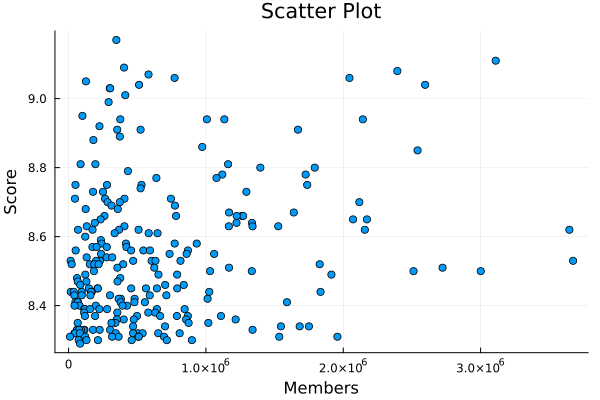

In [50]:
# Scatter plot
train_plot = scatter(anime.Members, anime.Score, title="Scatter Plot", xlabel = "Members", ylabel = "Score", legend = false)

### Split Data

In [40]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(anime,.75)

(186×12 DataFrame
 Row │ Rank   Title                              Popularity  Genre  Studio  Ty ⋯
     │ Int64  String                             Int64       Int64  Int64   In ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  Shingeki no Kyojin: The Final Se…         609      1       1     ⋯
   2 │     2  Fullmetal Alchemist: Brotherhood            3      2       2
   3 │     3  Bleach: Sennen Kessen-hen                 508      3       3
   4 │     4  Steins;Gate                                13      4       4
   5 │     6  Kaguya-sama wa Kokurasetai: Ultr…         221      6       6     ⋯
   6 │     7  Shingeki no Kyojin Season 3 Part…          26      7       7
   7 │     9  Gintama'                                  385      5       8
   8 │    10  Hunter x Hunter (2011)                     10      3       9
   9 │    11  Ginga Eiyuu Densetsu                      724      9      10     ⋯
  10 │    12  Gintama': Enchousen             

In [41]:
fm = @formula(Score ~ Members + Popularity + Duration + Episodes + Type + Genre + Studio)

FormulaTerm
Response:
  Score(unknown)
Predictors:
  Members(unknown)
  Popularity(unknown)
  Duration(unknown)
  Episodes(unknown)
  Type(unknown)
  Genre(unknown)
  Studio(unknown)

In [42]:
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Score ~ 1 + Members + Popularity + Duration + Episodes + Type + Genre + Studio

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error       t  Pr(>|t|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)   8.65967      0.0531962    162.79    <1e-99   8.55469       8.76465
Members       3.00162e-8   2.16855e-8     1.38    0.1680  -1.27776e-8    7.281e-8
Popularity   -1.22766e-5   1.79718e-5    -0.68    0.4954  -4.77418e-5    2.31886e-5
Duration      0.000514447  0.000406827    1.26    0.2077  -0.000288376   0.00131727
Episodes      0.0012726    0.000521609    2.44    0.0157   0.000243269   0.00230193
Type          0.00822191   0.0170237      0.48

### Model Evaluation using the R Square value

In [43]:
r2(linearRegressor)

0.39824075233370004

### Prediction

In [53]:
ypredicted_test = predict(linearRegressor, test)
first(ypredicted_test, 5)

5-element Vector{Union{Missing, Float64}}:
 8.737710147526219
 8.685856160994462
 8.651896370436283
 8.625293457219717
 8.703283825136236

In [52]:
ypredicted_train = predict(linearRegressor, train)
first(ypredicted_train, 5)

5-element Vector{Union{Missing, Float64}}:
 8.698982811910222
 8.851615939838517
 8.693490147656417
 8.767487696891008
 8.69013807058262

### Test Performance DataFrame

In [57]:
performance_testdf = DataFrame(y_actual = test[!,:Score], y_predicted = ypredicted_test)
first(performance_testdf, 5)

,y_actual,y_predicted
,Float64,Float64?
1,9.07,8.73771
2,9.05,8.68586
3,8.94,8.6519
4,8.91,8.62529
5,8.91,8.70328


In [58]:
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
first(performance_testdf.error, 5)

5-element Vector{Float64}:
 0.3322898524737816
 0.36414383900553915
 0.28810362956371627
 0.28470654278028285
 0.20671617486376448

In [60]:
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error
first(performance_testdf.error_sq, 5)

5-element Vector{Float64}:
 0.11041654605704755
 0.132600735485692
 0.08300370136778705
 0.08105781550190103
 0.04273157695030645

### Train Performance DataFrame

In [66]:
performance_traindf = DataFrame(y_actual = train[!,:Score], y_predicted = ypredicted_train)
first(performance_traindf, 5)

,y_actual,y_predicted
,Float64,Float64?
1,9.17,8.69898
2,9.11,8.85162
3,9.09,8.69349
4,9.08,8.76749
5,9.06,8.69014


In [67]:
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
first(performance_traindf.error, 5)

5-element Vector{Float64}:
 0.4710171880897782
 0.2583840601614824
 0.3965098523435824
 0.31251230310899203
 0.3698619294173806

In [69]:
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error 
first(performance_traindf.error_sq, 5)

5-element Vector{Float64}:
 0.2218571914760015
 0.06676232254553256
 0.15722006300552951
 0.0976639395944865
 0.13679784683234744

### Test Error

In [70]:
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)), "\n")
println("Mean Aboslute Percentage test error: ",mape(performance_testdf), "\n")
println("Root mean square test error: ",rmse(performance_testdf), "\n")
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

Mean Absolute test error: 0.11086567700943387



LoadError: UndefVarError: mape not defined

### Crossvalidation for model with highest accuracy

In [61]:
# Cross Validation function defination
function cross_validation(train,k, fm = @formula(Score ~ Members + Popularity + Duration + Episodes))
    a = collect(Kfold(size(train)[1], k))
    for i in 1:k
        row = a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end, row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Score], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]

        println("Mean error for set $i is ",mean(abs.(performance_testdf.error)))
    end
end

cross_validation (generic function with 2 methods)

In [62]:
cross_validation(train,10, fm)

Mean error for set 1 is 0.13568978646916885
Mean error for set 2 is 0.14446477370498093
Mean error for set 3 is 0.14281251695230723
Mean error for set 4 is 0.16347404351772266
Mean error for set 5 is 0.1464327716390248
Mean error for set 6 is 0.10857160570365387
Mean error for set 7 is 0.11862622317309462
Mean error for set 8 is 0.1365025452232612
Mean error for set 9 is 0.17192943857495693
Mean error for set 10 is 0.14956009721147948
